In [2]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Essai 1


In [ ]:
# Liste des mots à rechercher
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

nltk_stopwords = set(stopwords.words('french')+ [
    "alors", "au", "aucuns", "aussi", "autre", "avant", "avec", "avoir", "bon", "car", "ce", "cela", "ces", "ceux", 
    "chaque", "ci", "comme", "comment", "dans", "des", "du", "dedans", "dehors", "depuis", "devrait", "doit", "donc", 
    "dos", "début", "elle", "elles", "en", "encore", "essai", "est", "et", "eu", "fait", "faites", "fois", "font", 
    "hors", "ici", "il", "ils", "je", "juste", "la", "le", "les", "leur", "là", "ma", "maintenant", "mais", "mes", 
    "mine", "moins", "mon", "mot", "même", "ni", "nommés", "notre", "nous", "nouveaux", "ou", "où", "par", "parce", 
    "pas", "peut", "peu", "plupart", "pour", "pourquoi", "quand", "que", "quel", "quelle", "quelles", "quels", "qui", 
    "sa", "sans", "ses", "seulement", "si", "sien", "son", "sont", "sous", "soyez", "sujet", "sur", "ta", "tandis", 
    "tellement", "tels", "tes", "ton", "tous", "tout", "trop", "très", "tu", "valeur", "voie", "voient", "vont", 
    "votre", "vous", "vu", "ça", "étaient", "état", "étions", "été", "être", "de", "a", "4", "-", "une", "plus","7", 
    "un", "se", "'","_",'‘', 'ne', "cette", "bien", "toujours", "si", "aussi", "peu", "deux", "trois", "quatre", "cinq",
    "nature", "faire", "faut", "peut", "doit", "doivent", "peuvent", "peu", "peuvent", "peut", "peut", "peut", "peut",
    'chez', 'méme', "soit", "dont", "non", "tous", "toutes", "toute", "toute", "toute", "toute", "toute", "toute", "toute",
    'c’est', "dune", "d’une", "tant", "ainsi", "cest", "surtout", "étre", "pourtant", "souvent", "trés", "leurs", "quelques", 
    " ", "pendant", "aprés", "autres", "ment", "celle", "beaucoup"
])
words_to_search = ['préservatif', 'preservatif', 'préservatifs', 'preservatifs','preservative', 'preservatives', 'preserv',
                   'clitoris', 
                   'condom', 'condoms',
                   'tampon', 'tampons', 
                   'éponge', 'eponge', 'éponges', 'eponges', 
                   'vagin', 'vagins', 'vaginal', 'vaginaux',
                   'pessaire', 'pessaires']


def count_word_occurrences_normalized(book_path, years_df_path, words_to_search):
    # Charger les données des années de publication
    years_df = pd.read_csv(years_df_path)

    # Initialiser un dictionnaire pour stocker les occurrences des mots par année
    word_counts_by_year = {}

    # Liste des mots à ignorer
    words_to_ignore = set(nltk_stopwords)

    # Parcourir chaque ligne du DataFrame
    for index, row in years_df.iterrows():
        year = row['Année']
        title = str(row['Titre'])
        book_path_full = os.path.join(book_path, f'{title}')
        
        # Lire le contenu de tous les fichiers de pages dans le dossier du livre
        text = ''
        for page_file in os.listdir(book_path_full):
            page_path = os.path.join(book_path_full, page_file)
            with open(page_path, 'r', encoding='utf-8') as file:
                text += file.read() + ' '
        
        # Compter les occurrences des mots
        words = text.split()
        count_words = [word for word in words if word in words_to_search and word not in words_to_ignore and len(word) > 3]
        word_counts = Counter(count_words)
        
        # Ajouter les occurrences des mots au dictionnaire
        if year not in word_counts_by_year:
            word_counts_by_year[year] = Counter()
        word_counts_by_year[year].update(word_counts)
    
    return word_counts_by_year

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/alexisfirome/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
counts_mixtes = count_word_occurrences_normalized('../data/txt/ouvrages_mixtes', '../data/contexte/years_pub_mixtes.csv', words_to_search)
counts_femmes = count_word_occurrences_normalized('../data/txt/ouvrages_feminins', '../data/contexte/years_pub_feminins.csv', words_to_search)
counts_hommes = count_word_occurrences_normalized('../data/txt/ouvrages_masculins', '../data/contexte/years_pub_masculins.csv', words_to_search)

In [77]:
mapping = {
    'préservatif': 'préservatif',
    'préservatifs': 'préservatif',
    'preservatif' : 'préservatif',
    'preservatifs': 'préservatif',
    'preservative': 'préservatif',
    'preservatives': 'préservatif',
    'preserv': 'préservatif',
    'éponge': 'éponge',
    'éponges': 'éponge',
    'eponge': 'éponge',
    'eponges': 'éponge',
    'tampon': 'tampon',
    'tampons': 'tampon',
    'vagin': 'vagin',
    'vagins': 'vagin',
    'vaginal' : 'vagin',
    'vaginaux': 'vagin',
    'pessaires': 'pessaire',
    'pessaire': 'pessaire',
}

# Fonction pour appliquer le mapping à un Counter
def fusionner_mots(counter, mapping):
    nouveau_counter = Counter()
    for mot, count in counter.items():
        mot_normalise = mapping.get(mot, mot)  # Utilise le mot d'origine si non présent dans le mapping
        nouveau_counter[mot_normalise] += count
    return nouveau_counter

# Appliquer la fusion sur chaque année
mixtes = {annee: fusionner_mots(counter, mapping) for annee, counter in counts_mixtes.items()}
femmes = {annee: fusionner_mots(counter, mapping) for annee, counter in counts_femmes.items()}
hommes = {annee: fusionner_mots(counter, mapping) for annee, counter in counts_hommes.items()}


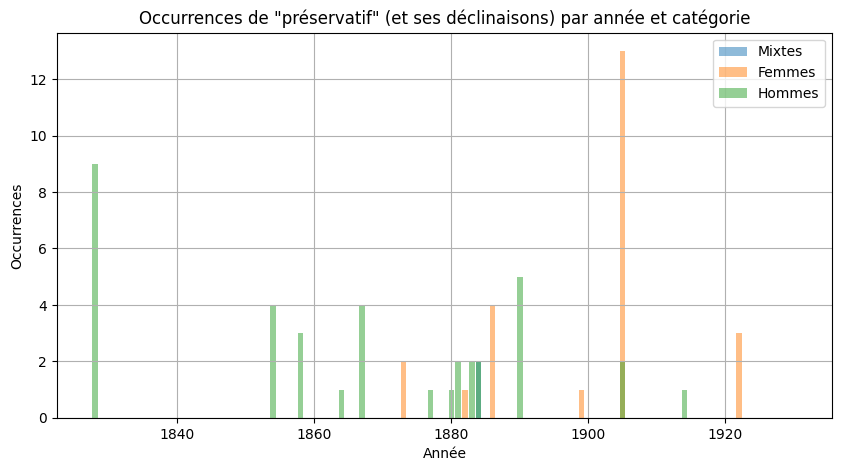

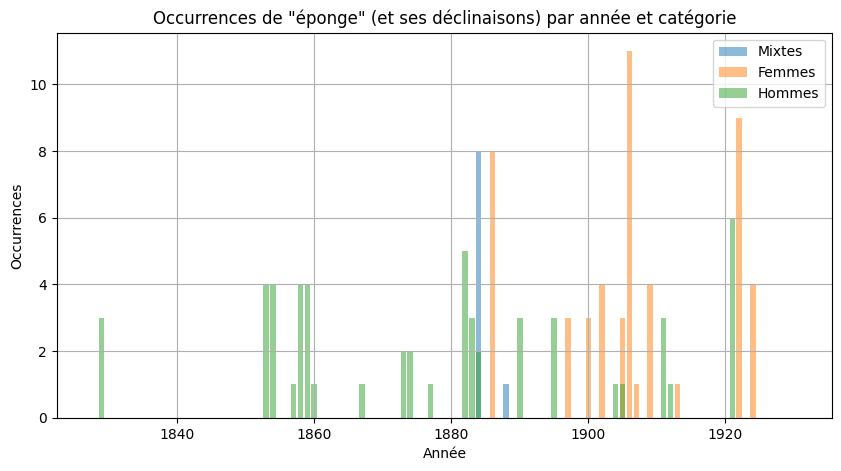

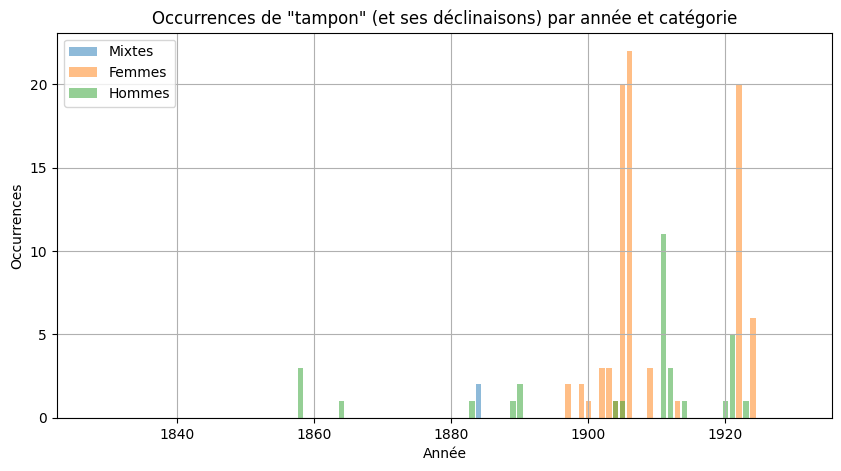

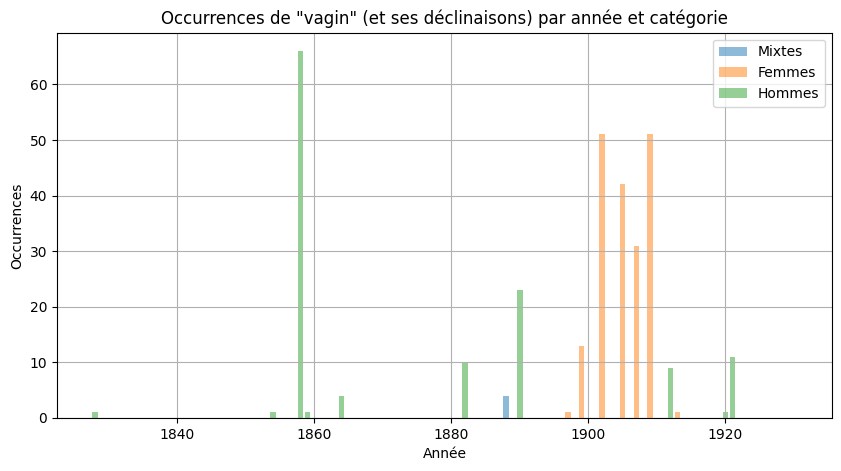

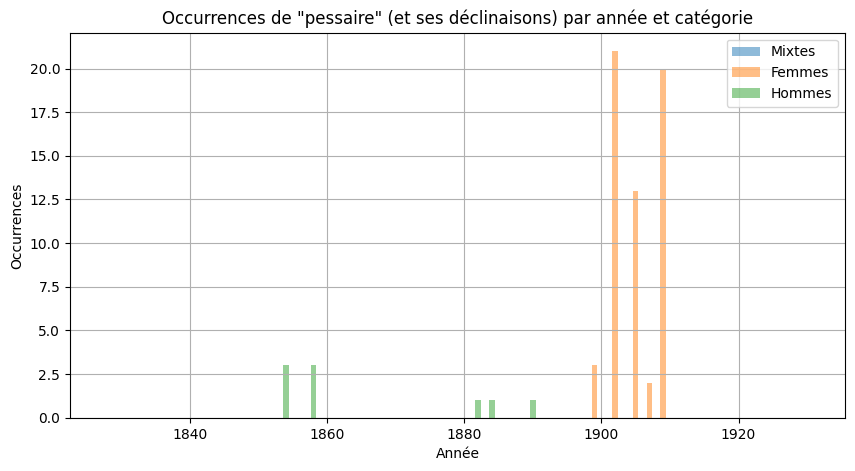

In [85]:
def plot_word_differences_by_category(mixtes, femmes, hommes, words_list):
    for word in words_list:
        years = sorted(set(mixtes.keys()).union(femmes.keys()).union(hommes.keys()))
        
        mixtes_counts = [mixtes.get(year, Counter()).get(word, 0) for year in years]
        femmes_counts = [femmes.get(year, Counter()).get(word, 0) for year in years]
        hommes_counts = [hommes.get(year, Counter()).get(word, 0) for year in years]
        
        plt.figure(figsize=(10, 5))
        plt.bar(years, mixtes_counts, label='Mixtes', alpha=0.5)
        plt.bar(years, femmes_counts, label='Femmes', alpha=0.5)
        plt.bar(years, hommes_counts, label='Hommes', alpha=0.5)
        
        plt.xlabel('Année')
        plt.ylabel('Occurrences')
        plt.title(f'Occurrences de "{word}" (et ses déclinaisons) par année et catégorie')
        plt.legend()
        plt.grid(True)
        plt.show()

words = ['préservatif', 'éponge', 'tampon', 'vagin', 'pessaire']
# Example usage
plot_word_differences_by_category(mixtes, femmes, hommes, words)